# 1장 시계열의 특징

다른 시점에서 관측된 실험 데이터를 분석하는 것은 통계적 모델링 및 추론에서 새로운 문제가 되고 있습니다. 시간 상에서 인접한 점들을 샘플링 하면 명백한 상관관계가 확인되는데, 이는 기존의 통계적 방법들이 인접 점들이 IID라고 가정한다는 점에서 어려움이 발생합니다. 시간 상에 상관관계를 갖는 문제에 대한 수학적, 통계적 해답을 찾는 방법을 시계열분석이라고 합니다.

중요한 시계열 문제들이 발생하는 다양한 분야에서 시계열분석의 영향을 확인할 수 있습니다. 예를들어, 경제학 분야에서는 많은 친숙한 시계열 정보가 발생합니다. 사회학자들은 출생률 또는 진학률과 같은 인구 시계열을 조사합니다. 임상역학자들은 특정 시간 주기 동안 관측되는 인플루엔자 원인의 수에 관심이 있을 것입니다. 약학 분야에서는, 고혈압 치료에 사용되는 약을 평가하는데 있어 시간에 따른 혈압 측정 값이 유용하게 사용될 수 있습니다. 뇌파의 자기 공명 시계열 정보는 다양한 실험 조건에서 특정 자극에 뇌가 어떻게 반응하는지 연구하는데 사용될 수 있습니다.

우리의 시각에서 보면, 시계열 정보를 조사하는 첫번째 단계는 시간에 따른 그래프 기록을 유심히 확인해 보는 것입니다. 이러한 면밀한 조사를 통해 종종 해석의 방법을 발견해내기도 하며 데이터의 정보를 요약하는데 사용될 통계적 방법을 발견해내기도 합니다. 특정 통계적 방법을 면밀히 살펴보기 전에, 2개의 별개인 (하지만 완전히 배타적이지는 않은) 시계열분석에 대한 접근법을 언급하고자 합니다. 이는 시간 영역 접근법과 주파수 영역 접근법 입니다. 시간 영역 접근법은 지연된 관계에 대한 조사를 가장 중요하게 여깁니다. (예를들어 오늘 일어난 일이 내일 발생할 일에 어떻게 영향을 미칠지) 반면, 주파수 영역 접근법은 추기에 대한 조사를 가장 중요하게 여깁니다. (예를들어 경기 부양 또는 후퇴의 주기) 우리는 다음 장들에서 이 2가지 접근법들을 알아볼 것입니다.

## 1.1 시계열 데이터의 성질

다양한 분야에서 시계열분석가들의 관심사항 및 의문사항들이 발생할 수 있습니다. 다음의 경우들은 일반적인 시계열 실험 데이터 들이며, 그 데이터들에 대해 발생할 수 있는 통계적 의문점들을 기술합니다.

### 예 1.1 Johnson & Johnson의 분기별 소득

그림 1.1은 미국 회사인 존슨&존슨의 분기별 소득을 보여줍니다. 1960년의 1분기부터 1980년의 4분기까지 84개 분기(21 년) 데이터가 측정되었습니다. 이러한 시계열 데이터에 대한 모델링은 시간이력 상의 주요한 패턴을 관찰하는 것으로 시작합니다. 이 경우, 추세에 따라 점진적으로 증가하는 양상이 보이며, 추세에 대한 변화는 매 주기 반복되는 것을 볼 수 있습니다. 이러한 형태의 데이터를 분석하는 방법은 2장 및 6장에서 알아볼 것입니다.

In [ ]:
install.packages("astsa")

In [1]:
library(astsa)

Warning message:
"package 'astsa' was built under R version 3.6.3"

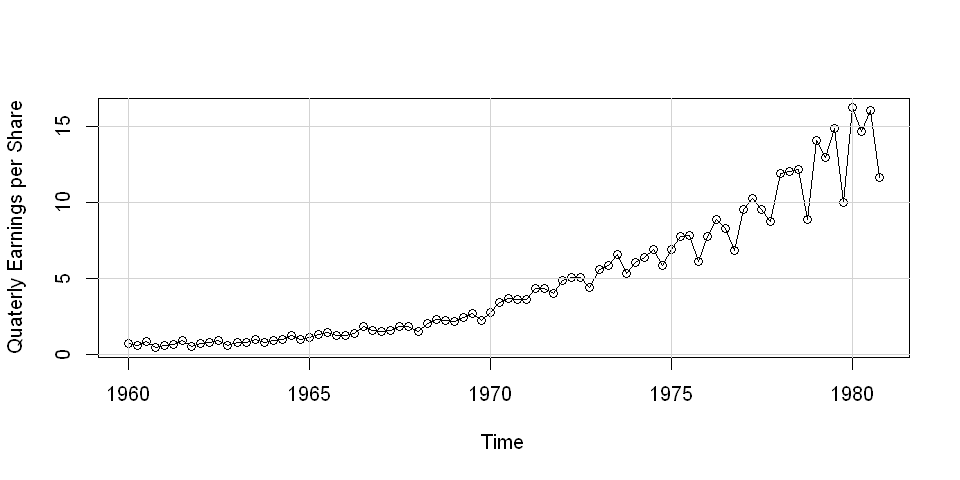

In [36]:
plot(jj, type="o", ylab="Quaterly Earnings per Share")
options(repr.plot.width=8, repr.plot.height=4); grid(lty=1);

**Fig. 1.1.** Johnson & Johnson quarterly earnings per share, 84 quarters, 1960-I to 1980-IV

### 예 1.2 지구 온난화

그림 1.2의 세계 온도 이력을 고려해 봅시다. 이 데이터는 세계 대륙-해양 평균 온도이며 1880년에서 2015년 까지 측정되었습니다. 지구 온난화에 대한 논의가 생긴 20세기 후반부터 온도가 상승하는 경향을 볼 수 있습니다. 또한 1935년에 평평하고, 1970년에 급격한 상승 경향을 보입니다. 지구 온난화 옹호자 및 반대자들의 관심사항은 전반적인 경향이 자연적인 것인지 인간에 의한 것인지입니다. 문제 2.8은 634년 간의 빙하 침전 데이터를 조사하며 이는 장기적인 온도 경향을 대표할 수있는 데이터 입니다. 온도에 대한 변화율은 100년 주기 동안 이상하지는 않습니다. 경향에 대한 판단은 특정주기에 국한되지 않습니다. 이 예제에 대한 R 코드는 예 1.1과 유사합니다.

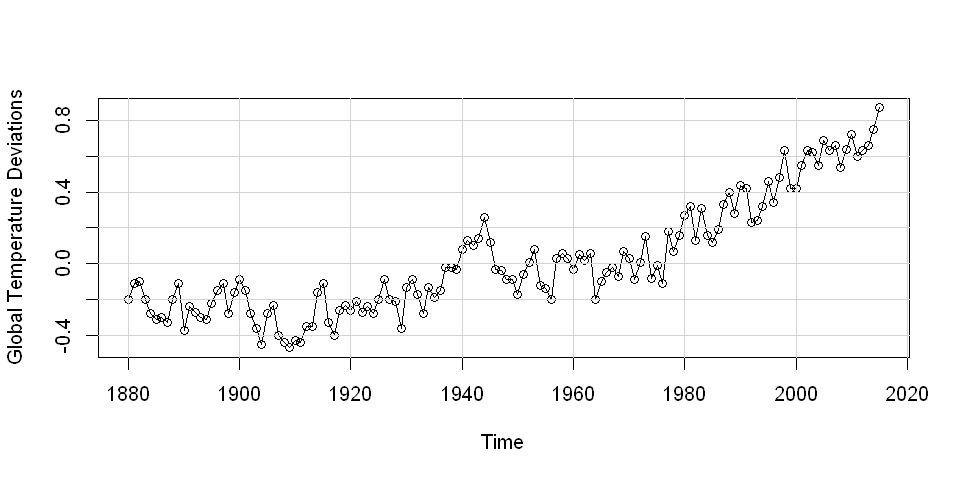

In [37]:
plot(globtemp, type="o", ylab="Global Temperature Deviations")
options(repr.plot.width=8, repr.plot.height=4); grid(lty=1);

**Fig. 1.2.** Yearly average global temperature deviations (1880-2015) in degrees centigrade

### 예 1.3 음성 데이터

그림 1.3은 '아'라고 한 음성에 대한 0.1초 (1000 개 포인트) 동안의 기록을 보여줍니다. 신호에는 반복성이 있고 주기성이 보입니다. 현재 관심이 많은 문제 중 하나는 컴퓨터가 음성을 인식하는 것이며 이는 특성 신호를 '아'라는 문구로 변경하는 것을 의미합니다. 스펙트럼 분석을 사용하여 다양한 음성 신호와 문구를 맞춰나갈 수 있습니다. 작은 wavelet들이 반복되는 것을 확인할 수 있습니다. 묶음(packet)들이 분리되는 것을 피치 주기(pitch period)라고 하며 성대(glottis)가 열리도 닫힘에 따른 주기적 신호에 대한 응답으로 볼 수 있습니다. R에서 그림1.3은 아래와 같이 그립니다.

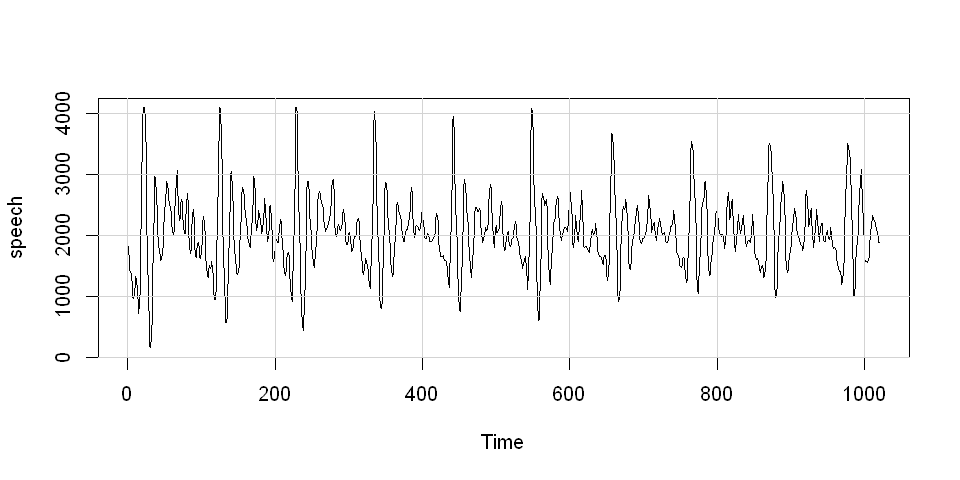

In [38]:
plot(speech)
options(repr.plot.width=8, repr.plot.height=4); grid(lty=1);

**Fig. 1.3.** Speech recording of the syllable aaa ... hhh sampled at 10,000 points per second with n = 1020 points

### 예 1.4 다우존스 산업 평균

(중략)

In [13]:
install.packages("xts")
install.packages("TTR")

Warning message:
"package 'xts' is in use and will not be installed"also installing the dependency 'curl'



package 'curl' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Owner\AppData\Local\Temp\RtmpGEwDka\downloaded_packages


Warning message:
"TTR::getYahooData is deprecated and will be removed in a future release.
Please use quantmod::getSymbols instead."Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"'C:\Users\Owner\AppData\Local\Temp\RtmpGEwDka\file3f343ec579a3'에서 readTableHeader에 의하여 발견된 완성되지 않은 마지막 라인입니다"Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"'C:\Users\Owner\AppData\Local\Temp\RtmpGEwDka\file3f343ec579a3'에서 readTableHeader에 의하여 발견된 완성되지 않은 마지막 라인입니다"

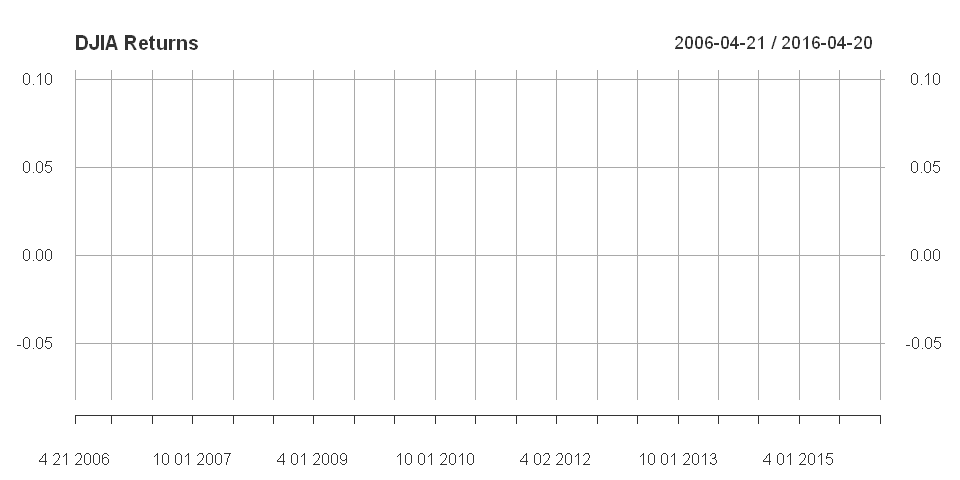

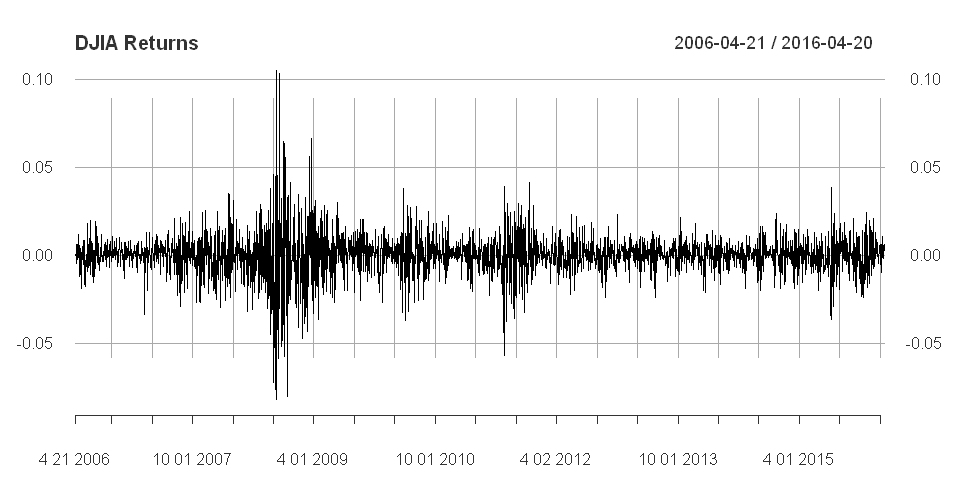

In [39]:
library(TTR)
djia = getYahooData("^DJI", start = 20060420, end = 20160420, freq = "daily")
library(xts)
djiar = diff(log(djia$Close))[-1] # approximate returns
plot(djiar, main="DJIA Returns", type="n")
lines(djiar)
options(repr.plot.width=8, repr.plot.height=4); grid(lty=1);

**Fig. 1.4.** The daily returns of the Dow Jones Industrial Average (DJIA) from April 20, 2006 to April 20, 2016

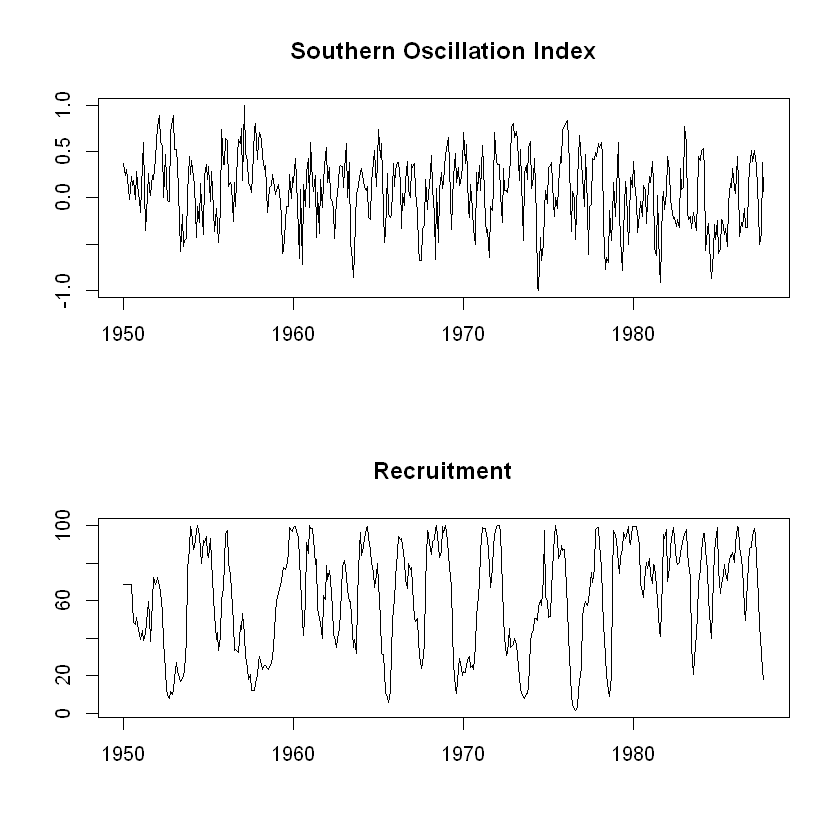

In [15]:
par(mfrow = c(2,1))  # set up the graphics
plot(soi, ylab="", xlab="", main="Southern Oscillation Index")
plot(rec, ylab="", xlab="", main="Recruitment")

**Fig 1.5** Monthly SOI and Recruitment (estimated new fish), 1950-1987

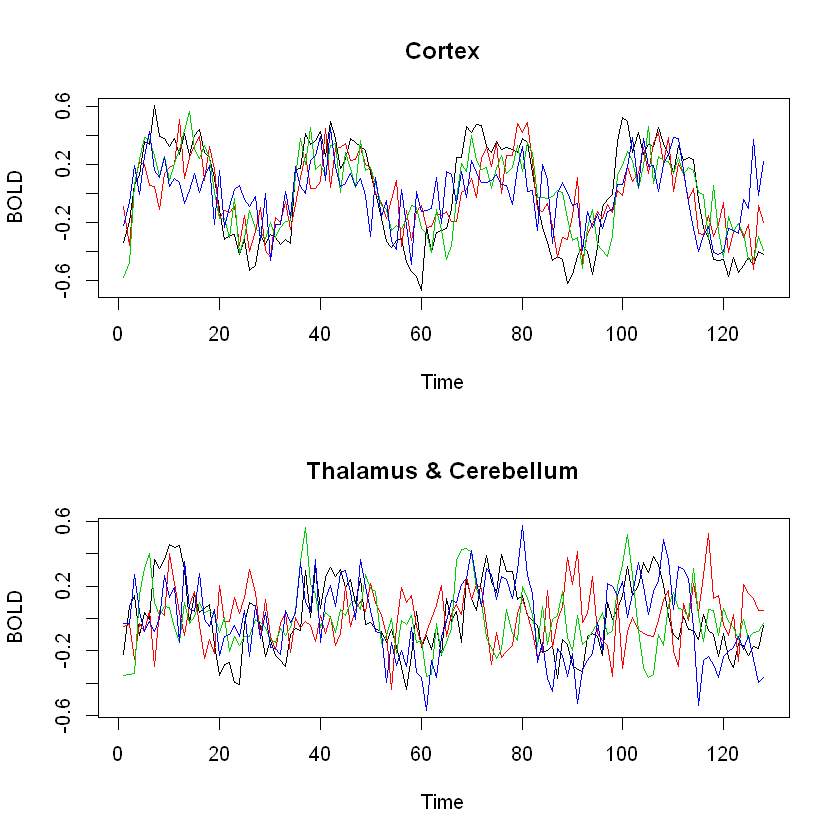

In [17]:
par(mfrow=c(2,1))
ts.plot(fmri1[,2:5], col=1:4, ylab="BOLD", main="Cortex")
ts.plot(fmri1[,6:9], col=1:4, ylab="BOLD", main="Thalamus & Cerebellum")

**Fig. 1.6.** fMRI data from various locations in the cortex, thalamus, and cerebellum; n=128 points, one observation taken every 2 seconds

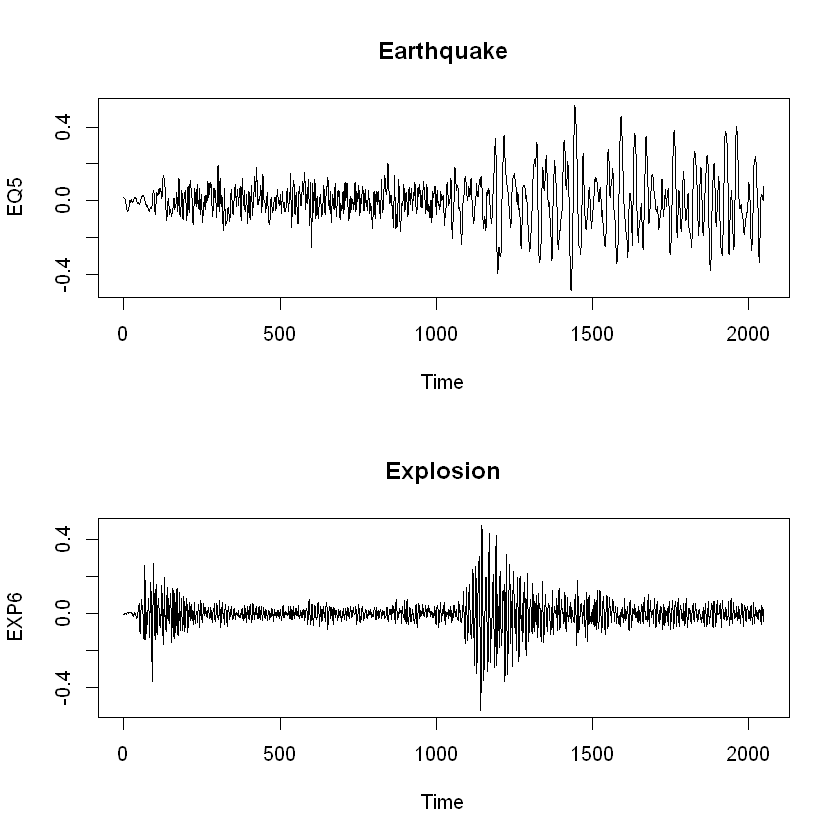

In [18]:
par(mfrow=c(2,1))
plot(EQ5,main="Earthquake")
plot(EXP6, main="Explosion")

**Fig. 1.7.** Arrival phases from an earthquake (top) and explosion (bottom) at 40 points per second

(중략)

## 1.2 시간이력 통계 모델

시계열 분석의 주된 목적은 샘플 데이터를 잘 설명하는 수학적 모델을 만드는 것입니다. 데이터가 무작위로 변동하는 특성을 모사하기 위해 우리는 랜덤변수의 집합이라고 가정합니다. 예를들어, 우리는 시간이력을 랜덤 변수들 $x_1, x_2, x_3, \dots, $로 고려할 수 있으며, 랜덤변수 $x_1$은 처음 시간에서 취득한 값, $x_2$는 두번째 시간 주기에서 취득한 값, $x_3$은 세번째 시간 주기에서 측정한 값 등으로 볼 수 있습니다. 일반적으로, 랜덤 변수들의 집합 $\{x_t\}$는 $t$로 구분하며 이는 확률과정(stochastic process)이라고 합니다. 이 책에서 $t$는 이산이고 정수 $t=0,\pm1,\pm2,\dots,$에 따라 달라진다고 고려할 것입니다. 확률 과정에서 관측된 값들은 확률과정의 현실화(realization)라고 합니다. 우리가 논의하는 이책에서는 명백하므로 시계열(시간이력)과 과정을 따로 구분하지 않겠습니다.

랜덤 변수들의 값을 세로축에 표시하고 시간을 가로축에 표시하는 것이 일반적인 표현 방법입니다. 인접한 시간 간격의 값을 연결하여 표현합니다. 앞장에서 다룬 다양한 시간이력들은 시간 상에서 연속적으로 보여지며 연속시간이력으로 다루기도 합니다. (중략) 랜덤 변수들의 집합을 사용하기 위한 접근법에 대해 알아보기 위해 예 1.8을 고려해 봅시다.

### 예 1.8 백색소음 (3 flavors)

평균이 0이고 분산이 $\sigma_w^2$인 서로 연관이 없는 랜덤 변수 $w_t$의 집합을 고려해 봅시다. 공학 분야에서 상호 독립적으로 생성한 시간이력은 잡음으로 고려합니다. 그리고 이를 백색소음이라고 합니다. 우리는 이 과정을 $w_t \sim wn(0,\sigma_w^2)$으로 표현할 것입니다. 백색이라는 명칭은 백색광과의 유사점에서 유래되었습니다.

우리는 가끔 평균이 0이고 분산이 $\sigma_w^2$인 IID 랜덤 변수가 필요할 것입니다. 우리는 이를 $w_t\sim iid(0,\sigma_w^2)$로 표현하거나 백색 독립 소음 또는 IID 소음이라고 부를 것입니다.가우시안 백색소음은 특히 유용하며 $w_t\sim iidN(0,\sigma_w^2)$로 표기하겠습니다. 그림1.8은 $\sigma_w^2=1$인 가우시안 랜덤 변수 500개를 나타냅니다. 이는 그림 1.7과 약간 비슷하지만 적절한 모델을 만들기에는 부드럽지 않습니다. 많은 다른 종류의 진동이 조합된 형태를 보입니다.

만약 모든 시간이력의 통계적 거동이 백색소음 모델로 설명될 수 있다면, 고전 통계학적 방법으로 충분합니다. 예 1.9와 1.10은 연속 상관관계 및 부드러움을 추가하기 위한 방법을 보여줍니다.

### 예 1.9 이동 평균 및 필터링

우리는 백색소음 $w_t$에 이동평균을 적용하여 더 부드럽게 할 수 있습니다. 예를들어 예 1.8의 $w_t$를 현재 값과 인접한 값들의 평균으로 대체하는 경우를 생각해 봅시다. 즉,

$$v_t=\frac{1}{3}(w_{t-1}+w_t+w_{t+1}),\;\;\;\;\tag{1.1}$$

이는 그림 1.8의 아래쪽에 나타나 있습니다. 더 부드러운 버전의 이력을 보면 더 느린 진동이 명백히 보이며 빠른 진동은 사라집니다. 우리는 그림 1.5의 SOI 또는 그림 1.6의 fMRI와의 유사성을 볼 것입니다.

(1.1)의 선형 조합은 필터된 이력이라고 하며 그림 1.8을 위해 다음의 코드에서 filter 명령어를 사용할 것입니다.

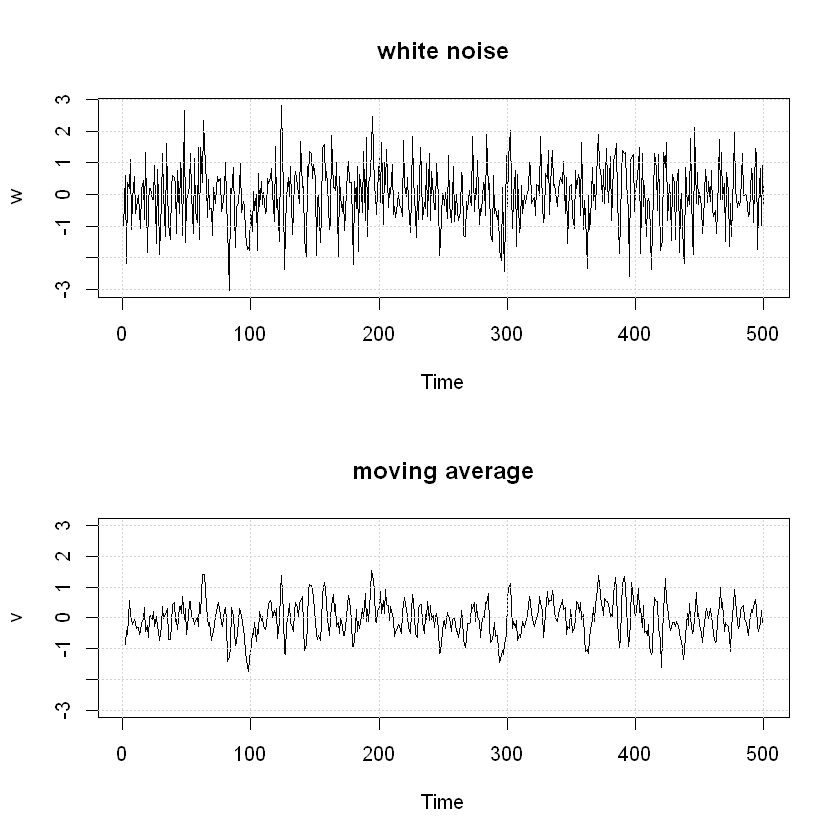

In [8]:
w = rnorm(500,0,1)          # 500 N(0,1) variates
v = filter(w, sides = 2, filter = rep(1/3,3))  # moving average
par(mfrow=c(2,1))
plot.ts(w, main = "white noise"); grid()
plot.ts(v, ylim = c(-3,3), main="moving average"); grid()

**Fig. 1.8.** Gaussian white noise series (top_ and three-point moving average of the Gaussian white noise series (bottom).

그림 1.3, 1.5, 1.6은 이동 평균 결과와 다릅니다. 왜냐하면 특정 진동 거동이 포함되어 있기 때문입니다. 이러한 준-주기(quasi-periodic)성 거동을 만드는 많은 방법들이 있습니다. 그 중 3장에서 다루게 될 자기회기 모델(autoregressive model)에 대해 설명하겠습니다.

### 예 1.10 자기회기

예 1.8의 백색 소음을 입력으로 2차 방정식 출력을 계산한다고 합시다.

$$x_t=x_{t-1}-0.9x_{t-2}+w_t \tag{1.2}$$

여기서 $t=1,2,\dots,500$으로 고려합시다. 식(1.2)는 과거 2개의 값을 사용해 현재의 값을 예측 또는 회기하는 형태입니다. 따라서 자기회기라는 용어를 이 모델에 적용할 수 있습니다. 초기 값에 대한 문제가 있지만 초기 값을 알고 있다고 가정하여 계산해 나갑니다. 계산한 출력 결과는 그림 1.9에 나타나 있습니다. 이는 그림1.3과 유사한 주기적 거동을 보입니다. 상기의 자기회기 모델과 그에 대한 일반적인 사항에 대해서는 3장에서 자세히 다루겠습니다.

이전의 예제들과 같이, 백색소음을 필터링하여 데이터를 얻습니다. filter 함수를 사용하고 초기 값들은 0으로 설정합니다. 이 경우, $x_1=w_1$, $x_2 = x_1 + w_2 = w_1 + w_2$와 같이 되며 이 값들은 식(1.2)를 만족 못합니다. 이러한 문제를 해결하기 위한 쉬운 방법은 필요 이상으로 오랫동안 필터링을 수행하여 초기 값을 제거하는 것입니다.

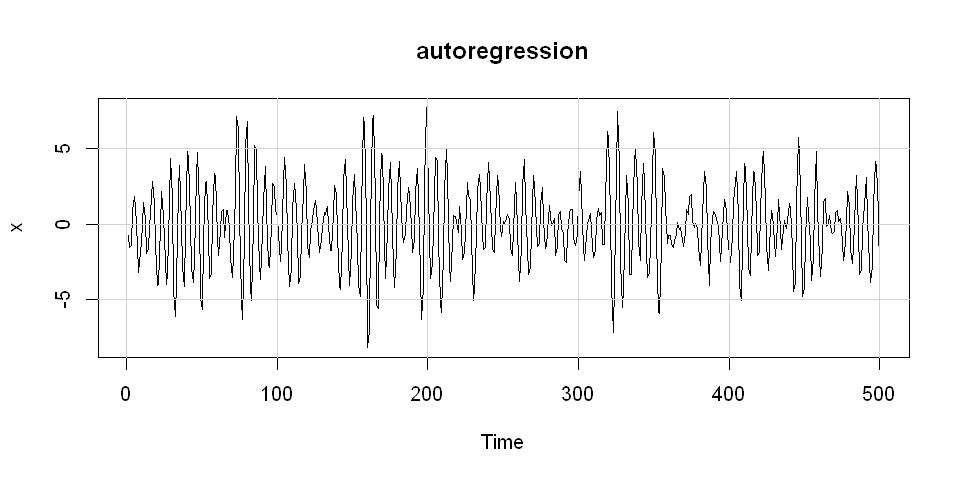

In [40]:
w = rnorm(550,0,1)               # 50 extra to avoid startup problems
x = filter(w, filter=c(1,-.9), method = "recursive")[-(1:50)] # remove first 50
plot.ts(x, main = "autoregression")
options(repr.plot.width=8, repr.plot.height=4); grid(lty=1);

**Fig. 1.9.** Autoregressive series generated from model (1.2).

### 예 1.11 Random Walk with Drift

그림 1.2의 세계 온도 데이터와 같은 경향을 분석하기 위한 모델은 다음과 같이 주어지는 random walk with drift 모델입니다.

$$x_t=\delta+x_{t-1}+w_t\tag{1.3}$$

여기서 $w_t$는 백색소음이고, $x_0=0$, $t=1,2,\dots$입니다. 상수 $\delta$는 drift라고 불립니다. $\delta=1$이면 단순히 random walk가 됩니다. random walk라는 용어는 $\delta=0$일 때 시간 $t$에서의 값은 $t-1$의 값 더하기 $w_t$에 의해 결정되는 랜덤 이동에 의해 결정된다는 사실에 유래되었습니다. (1.3)은 백색 소음 변화의 누적 합으로 다음과 같이 표현 가능합니다.

$$x_t=\delta t + \sum_{j=1}^{t}w_j\tag{1.4}$$

그림 1.10은 $\delta = 0, 2$, $\sigma_w=1$인 모델에서 생성한 200개의 데이터를 보여줍니다. 비교를 위해 $.2t$의 직선도 함께 표시하였습니다. 

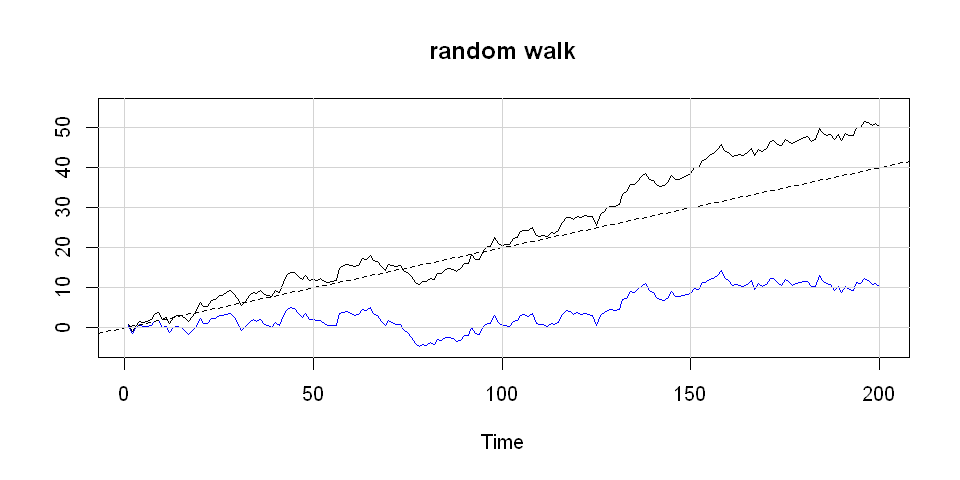

In [41]:
set.seed(154)   # so you can reproduce the results
w = rnorm(200); x = cumsum(w) # two commands in one line
wd = w + .2;   xd = cumsum(wd)
options(repr.plot.width=6, repr.plot.height=4)
plot.ts(xd,ylim=c(-5,55),main="random walk",ylab='')
lines(x, col=4); abline(h=0,col=4,lty=2); abline(a=0,b=.2,lty=2); 
options(repr.plot.width=8, repr.plot.height=4); grid(lty=1);

**Fig. 1.10.** Random walk, $\sigma_w=1$, with drift $\delta=.2$( upper jagged line), without drift, $\delta=0$ (lower jagged line), and straight (dashed) lines with slope $\delta$ 